PROJECT OBJECTIVE: Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library.

In [1]:
# Import necessary libraries
import os
import cv2
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import glob
import zipfile

# Import the Image class from the PIL module
from PIL import Image

In [2]:
tf.__version__

'2.15.0'

In [3]:
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Part 2.1 a - Unzip, read and Load data(‘PINS.zip’)
into session.

In [5]:
#To print a list of all the files and directories in the directory ../content
print(os.listdir("../content"))

['.config', 'drive', 'sample_data']


In [6]:
#To get the current working directory
print(os.getcwd())

/content


In [7]:
# Defines the zip file path, imports the library and extracts all the files
images_file_zip = '/content/drive/MyDrive/Computer Vision/CV Project/PINS.zip'   # Defines the path to the zip file

from zipfile import ZipFile                                                      # Imports the ZipFile library

with ZipFile(images_file_zip, 'r') as z:                                         # Extracts the files from the Zip file to the current working directory

  z.extractall()                                                                 # Equivalent to using the unzip command-line utility to extract the files

Part 2.1 b - Write function to create
metadata of the image.

In [8]:
import numpy as np
import os

#Defines a Python class called IdentityMetadata
class IdentityMetadata():
    def __init__(self, base, name, file):                                        #constructor method for the IdentityMetadata class
        # print(base, name, file)
        # dataset base directory
        self.base = base                                                         #base URL of the identity provider
        # identity name
        self.name = name                                                         #name of the  identity provider
        # image file name
        self.file = file                                                         #path to the file containing the identity provider's metadata

    def __repr__(self):                                                          #special method - return a string representation of an object
        return self.image_path()                                                 #string - represents the path to the image being classified

    def image_path(self):                                                        #property that returns the value of the self.image_path attribute
        return os.path.join(self.base, self.name, self.file)                     #constructs path to the image file


The IdentityMetadata class is a data structure that represents the metadata associated with an identity provider. It contains information such as the provider's name, logo, and authentication URL.

Part 2.1 c - Write a loop to iterate through each and
every image and create metadata for all the
images.

In [9]:
def load_metadata(path):                         #loads the metadata of an image from a given path
    metadata = []                                #list to store the metadata for an image
    for i in os.listdir(path):                   #Iterates through subdirectories in the given directory.
        for f in os.listdir(os.path.join(path, i)):       #Iterates through files in each subdirectory.
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':  #If the file has a .jpg or .jpeg extension,
                metadata.append(IdentityMetadata(path, i, f)) #an IdentityMetadata object is created and appended to the metadata list.
    return np.array(metadata)                    #converts the list to a numpy array

In [10]:
# Call load_metadata to read the images and assign metadata to a variable

metadata = load_metadata('PINS')

This code will first load the metadata for all the images in the directory PINS. The metadata will be stored in the metadata variable.

In [11]:
# Write a function to read image using opencv and convert it from BGR to RGB

def load_image(path):                #define the function
    image = cv2.imread(path, 1)        #load the image from the path in color mode (ie. why 1 is mentioned)
    # OpenCV loads color-channeled images in a BGR order.
    # Thus, we must turn them around to RGB order.
    return image[...,::-1]             #slicing with a step of -1 to reverse order of color channels

We need to convert from BGR to RGB because most other libraries and applications use RGB order for color channels.

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  1,   0,   0],
        ...,
        [253, 250, 233],
        [206, 203, 188],
        [149, 145, 134]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  2,   0,   1],
        ...,
        [255, 252, 237],
        [208, 205, 190],
        [151, 147, 136]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  2,   0,   1],
        ...,
        [255, 253, 238],
        [209, 206, 191],
        [152, 148, 137]]], dtype=uint8)
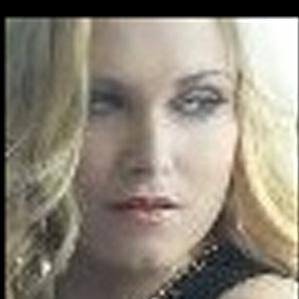

In [12]:
load_image(metadata[0].image_path()) #loads the first image in the metadata array
                                     #& converts it from BGR to RGB color order.

Dimensions: 3          #each element can be identified by 3 indices
Shape: (299, 299, 3)   #299, 299 and 3 elements in 1st, 2nd & 3rd dimensions
                       respectively, also represents (height,width,no. of color channels)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
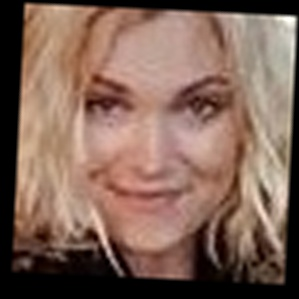

In [13]:
load_image(metadata[1].image_path())

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
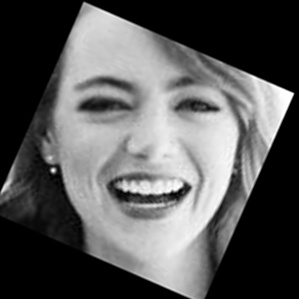

In [14]:
load_image('/content/PINS/pins_Emma Stone/Emma Stone100.jpg')

Part 2.1 d - Generate Embeddings vectors on the
each face in the dataset.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

The vgg_face function in the code snippet you provided is a function that loads a pre-trained VGGFace model.

VGGFace is a deep learning model that was trained on a large dataset of facial images. The model can be used for tasks such as face recognition, facial expression recognition, and gender classification.

In [16]:
model = vgg_face() #calls the vgg_face function to load the VGGFace model with the top layer included.
model.load_weights('/content/drive/MyDrive/Computer Vision/CV Project/vgg_face_weights.h5')   #loads the weights for the model from the specificed path.

The weights file contains the values for the model's parameters.

In [17]:
model.layers[0], model.layers[-2]

(<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D at 0x7c25c823f850>,
 <keras.src.layers.reshaping.flatten.Flatten at 0x7c25c40cde10>)

The expressions model.layers[0] and model.layers[-2] refer to the first and second-to-last layers of the model object, respectively.     

model.layers[0] is the input layer as well as the first layer in the model.  

model.layers[-2] is the output layer as well as the second-to-last layer in the model.

The last layer in the model is the predictions layer that produces the final predictions.

In [18]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

The code snippet here, creates a new Keras model called vgg_face_descriptor.

The new model has two properties:

Inputs: The input layer of the original model (model.layers[0].input).
Outputs: The second-to-last layer of the original model (model.layers[-2].output).

This means that the new model will take the same input as the original model and produce the same output as the second-to-last layer of the original model.

In [19]:
type(vgg_face_descriptor)

keras.src.engine.functional.Functional

The type of vgg_face_descriptor is <class 'keras.src.engine.functional.Functional'. This means that vgg_face_descriptor is an instance of the Functional class from the keras.src.engine module.

The Functional class is a subclass of the Model class. This means that vgg_face_descriptor is also an instance of the Model class.

In [20]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

The first list contains a single Keras tensor, which represents the input layer of the vgg_face_descriptor model. The input layer has the following properties:

Shape: (None, 224, 224, 3)
Data type: float32     

Each sample in the batch must have the following properties:
Height: 224 pixels
Width: 224 pixels
Number of channels: 3 (RGB)

The second list contains a single Keras tensor, which represents the output layer of the vgg_face_descriptor model. The output layer has the following properties:

Shape: (None, 2622)
Data type: float32

The 2622 in the shape means that each sample in the batch must have 2622 elements.

This could represent a variety of things, such as:

A vector of 2622 features
A sequence of 2622 elements
A 2622x1 matrix

The None in the shape of both tensors means that the tensors can have any batch size.

In [21]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()       #gets the path to an image file
img = load_image(img_path)                  #loads the image from the path & stores in img

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)      #normalizes the image
img = cv2.resize(img, dsize = (224,224))   #resizes the image to pixel size 224*224
print(img.shape)                           #prints the shape of the image

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
# Expands the dimensions of the image, predicts the embedding vector for the image
# using the vgg_face_descriptor model, and then selects the first embedding vector
# from the list of predicted embedding vectors.
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 3s 3s/step
(2622,)


The output is explained as follows:

The image has a height of 224 pixels, a width of 224 pixels, and 3 channels (RGB).

The vgg_face_descriptor model took 2 seconds to predict the embedding vector for the image.

The embedding vector for the image is a NumPy array with 2622 elements.(This means that the vgg_face_descriptor model has extracted 2622 features from the image.)

These features can be used for a variety of tasks, such as:
Face recognition, Facial expression recognition, Gender classification (in images). The embedding vector is a powerful representation of the image. It captures the most important features of the image in a compact form.

In [22]:
#Write code to iterate through metadata and create embeddings for each image using vgg_face_descriptor.predict() and store in a list with name embeddings

In [23]:
total_images = len(metadata)   #calculates total number of images in the metadata list

In [24]:
print(total_images)

10770


In [25]:
# If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [26]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step


Embedding vectors of images, also known as image embeddings, are numerical representations of images that capture their visual content and semantic meaning. Similar to word embeddings, image embeddings are learned from large datasets using deep learning models.

The above code performs the following:

a. Creates a NumPy array to store the embedding vectors

b. Loops through the metadata list and extracts the embedding vector for each image - This loop iterates through the metadata list. For each element in the list, the loop does the following:

Gets the path to the image file associated with the element.

Loads the image from the path.

Normalizes the image.

Resizes the image to a size of 224x224 pixels.

Predicts the embedding vector for the image using the vgg_face_descriptor model.

Stores the embedding vector in the embeddings array.

The embeddings array can then be used for tasks such as face recognition, facial expression recognition, and gender classification.

In [27]:
print('embeddings shape :', embeddings.shape)

embeddings shape : (10770, 2622)


The shape of the embeddings array is (10770, 2622). This means that the embeddings array has 10770 rows and 2622 columns.

Each row in the embeddings array represents the embedding vector for a single image. Each column in the embeddings array represents a single feature that has been extracted from the images.

The vgg_face_descriptor model extracts 2622 features from each image. These features can be used for tasks such as face recognition, facial expression recognition, and gender classification.

Part 2.1 e - Build distance metrics for identifying the
distance between two similar and dissimilar
images.

In [28]:
# Consider distance metric as "Squared L2 distance"
# Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [29]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

The distance metric used here is the Euclidean distance.

The Euclidean distance between two vectors is calculated by taking the square root of the sum of the squared differences between the corresponding elements of the vectors.

This code calculates the distance between the embedding vectors for two images. If the distance is small, then the two images are likely to be of the same person. Otherwise, the two images are likely to be of different people.

In [30]:
# Plot images and get distance between the pairs given below
# 2, 3 and 2, 180
# 30, 31 and 30, 100
# 70, 72 and 70, 115

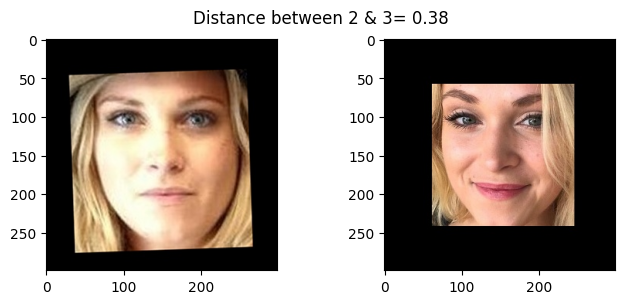

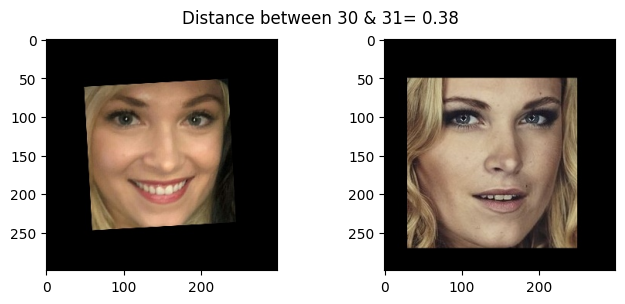

In [31]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));

show_pair(2, 3)
show_pair(30, 31)

The distance between two embeddings is a measure of how different the two embeddings are.

The smaller the distance, the more similar the two embeddings are.

The larger the distance, the less similar the two embeddings are.

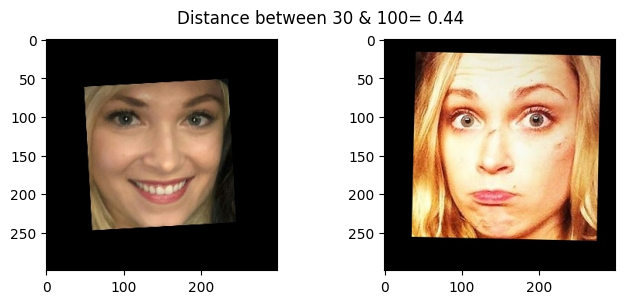

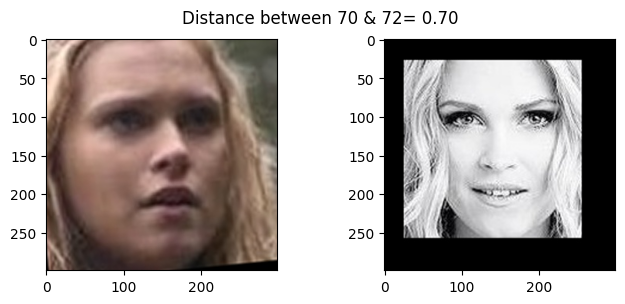

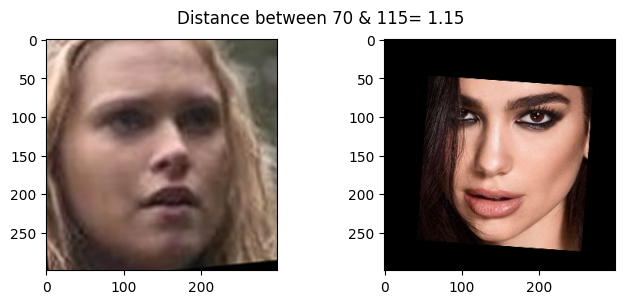

In [32]:
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

Part 2.1 f - Use PCA for dimensionality reduction.

In [33]:
#Create X_train, X_test and y_train, y_test
#Use train_idx to seperate out training features and labels
#Use test_idx to seperate out testing features and labels

In [34]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     # This array contains the indices of all the elements in the metadata array that are not multiples of 9
test_idx = np.arange(metadata.shape[0]) % 9 == 0      # This array contains the indices of all the elements in the metadata array that are multiples of 9.

# one half as train examples of 10 identities
X_train = embeddings[train_idx]                # X_train array will contain the embedding vectors for all of the elements in the metadata array that are not multiples of 9.

# another half as test examples of 10 identities
X_test = embeddings[test_idx]                  # X_test array will contain the embedding vectors for all of the elements in the metadata array that are multiples of 9.

targets = np.array([m.name for m in metadata]) # uses a list comprehension to extract the names of all of the people in the metadata array and store them in the targets array.

#train labels
y_train = targets[train_idx]                   # y_train array will contain the names of all of the people in the metadata array that are not multiples of 9.

#test labels
y_test = targets[test_idx]                     # y_test array will contain the names of all of the people in the metadata array that are multiples of 9.


In [35]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (9573,2622)
y_train shape : (9573,)
X_test shape : (1197,2622)
y_test shape : (1197,)


There are 9573 training samples and 1197 test samples.
Each sample has 2622 features.
Each sample has a single label.

The fact that each sample has a single label suggests that this is a classification problem. The fact that each sample has 2622 features suggests that the data is high-dimensional.

In [36]:
len(np.unique(y_test)), len(np.unique(y_train))

(100, 100)

100 unique labels are present in the y_test and y_train arrays.

In [37]:
# Encode the targets
# Use LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

The LabelEncoder class is used to encode categorical data into numerical values. This is useful for machine learning algorithms that require numerical input features.

The fit_transform() method first learns a mapping from the unique values in the y_train array to integers. It then uses this mapping to transform the labels in the y_train array into numerical values.

In [39]:
print(le.classes_)     #prints the unique labels in the y_train array in the order that they were encountered by the LabelEncoder.
y_test_enc = le.transform(y_test)  #transform the labels in the y_test array into numerical values using the mapping that was learned by the LabelEncoder when it was fitting to the y_train array.

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman'
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_R

In [40]:
print('y_train_encoded : ', y_train_enc)
print('y_test_encoded : ', y_test_enc)

y_train_encoded :  [75 75 75 ... 88 88 88]
y_test_encoded :  [75 75 75 ... 88 88 88]


This information can be useful for debugging purposes and for understanding how the LabelEncoder has transformed the labels in the y_train and y_test arrays.

In [41]:
# Scale the features using StandardScaler

In [42]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  #to standardize features by removing the mean and scaling to unit variance
X_train_stdrd = scaler.fit_transform(X_train)

PCA requires standardized data, so the first step is to standardize the data to ensure that all variables have a mean of 0 and a standard deviation of 1.

The fit_transform() method first fits the scaler to the data. This means that it calculates the mean and standard deviation of each feature. It then uses this information to transform the data.

The resulting array, X_train_std, contains the standardized features.

In [43]:
X_test_stdrd = scaler.transform(X_test)

The transform() method uses the mean and standard deviation that were calculated by the fit() method to transform the data.

The resulting array, X_test_std, contains the standardized features for the test data.

In [44]:
print('X_train_std shape : ({0},{1})'.format(X_train_stdrd.shape[0], X_train_stdrd.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_enc.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_stdrd.shape[0], X_test_stdrd.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_enc.shape[0]))

X_train_std shape : (9573,2622)
y_train_encoded shape : (9573,)
X_test_std shape : (1197,2622)
y_test_encoded shape : (1197,)


There are 9573 training samples and 1197 test samples.
Each sample has 2622 features.
Each sample has a single label.

The fact that each sample has a single label suggests that this is a classification problem. The fact that each sample has 2622 features suggests that the data is high-dimensional.

In [45]:
# Reduce feature dimensions using Principal Component Analysis
# Set the parameter n_components=128

In [46]:
from sklearn.decomposition import PCA

pri_comp_ana = PCA(n_components=128)                     #keep the top 128 principal components
X_train_pca = pri_comp_ana.fit_transform(X_train_stdrd)  #first fits the PCA object to the data
X_test_pca = pri_comp_ana.transform(X_test_stdrd)        #uses the PCA object to transform the X_test_std array

The PCA object is used to reduce the dimensionality of the data. This can be useful for improving the performance of machine learning algorithms.

The fit_transform() method first fits the PCA object (pri_comp_ana) to the data. This means that it calculates the eigenvectors and eigenvalues of the data. It then uses this information to transform the data.

The resulting array, X_train_pca, contains the transformed features for the training data.

The transform() method uses the eigenvectors and eigenvalues that were calculated by the fit() method to transform the data.

The resulting array, X_test_pca, contains the transformed features for the test data.

Part 2.1 g - Build an SVM classifier in order to map
each image to its right person.

In [47]:
from sklearn.svm import SVC

clsfr = SVC(C=5., gamma=0.001)
clsfr.fit(X_train_pca, y_train_enc)

SVC(C=5.0, gamma=0.001)

The SVC class is used to train a binary classifier. In this case, we are using the SVC class to train a multi-class classifier because the y_train_enc array contains multiple classes.

clsfr = SVC(): Creates an instance of the SVC classifier and stores it in the variable clsfr.

C=5. and gamma=0.001: These are keyword arguments passed to the SVC constructor to set the values of the hyperparameters C and gamma.

C: Regularization parameter. Higher values of C penalize misclassifications more heavily.

gamma: Kernel coefficient. It influences the shape of the decision boundary.

In this case, we are setting the C parameter to 5. and the gamma parameter to 0.001.

C parameter set to 5 indicates that we want the SVC model to prioritize avoiding misclassifications over having a wide margin.

gamma parameter set to 0.001 indicates that we want the SVC model to use a relatively simple decision boundary.

In [48]:
clsfr.fit(X_train_pca, y_train_enc)

SVC(C=5.0, gamma=0.001)

In [49]:
y_pred = clsfr.predict(X_test_pca)

The predict() method takes an array of feature vectors as input and returns an array of predicted labels.

In this case, the X_test_pca array contains the feature vectors for the test data. The y_pred array will contain the predicted labels for the test data.

In [50]:
print('y_predict : ',y_pred)
print('y_test_encoded : ',y_test_enc)

y_predict :  [75 75 75 ... 88 88 88]
y_test_encoded :  [75 75 75 ... 88 88 88]


The predicted labels (y_pred) and the true labels (y_test_enc) are identical.

This means that the SVM model has perfectly classified the test data.

In [51]:
y_pred_enc = le.inverse_transform(y_pred)

It uses the LabelEncoder object to transform the predicted labels back to their original format.

The inverse_transform() method takes an array of encoded labels as input and returns an array of original labels.

In this case, the y_pred array contains the predicted labels that were encoded using the LabelEncoder. The y_predict_enc array will contain the original labels.

In [52]:
print('y_predict shape : ', y_pred.shape)
print('y_test_encoded shape : ', y_test_enc.shape)

y_predict shape :  (1197,)
y_test_encoded shape :  (1197,)


The shapes of the y_predict and y_test_enc arrays are both (1197,). This means that there are 1197 predicted labels and 1197 true labels.

This is consistent with the fact that the X_test_std array also has 1197 samples.

In [53]:
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score
accuracy_score(y_test_enc, y_pred)

0.9473684210526315

The accuracy score of 0.9473684210526315 means that the model correctly predicted the labels for 94.56% of the samples in the test set.

This is a very good result.

Part 2.1 h - Import and display the the test images.

Hint: ‘Benedict Cumberbatch9.jpg’ and ‘Dwayne Johnson4.jpg’ are the test images.

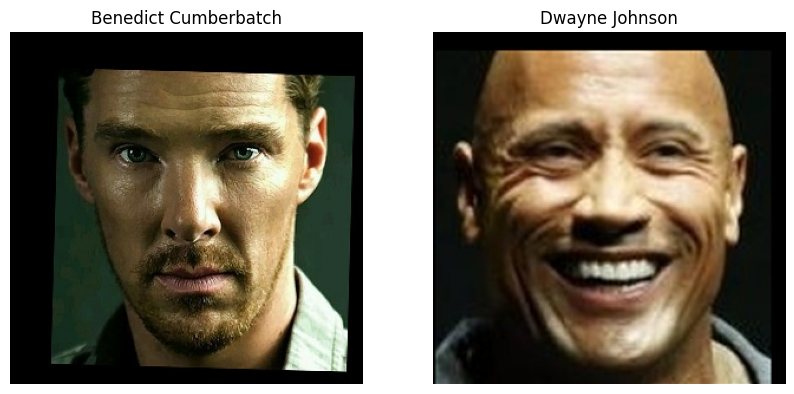

In [225]:
import matplotlib.pyplot as plt

# Load the images
image_1 = plt.imread("/content/drive/MyDrive/Computer Vision/CV Project/Benedict+Cumberbatch9.jpg")
image_2 = plt.imread("/content/drive/MyDrive/Computer Vision/CV Project/Dwayne+Johnson4.jpg")

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.title("Benedict Cumberbatch")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_2)
plt.title("Dwayne Johnson")
plt.axis("off")

plt.show()

In [226]:
print(image_1.shape)
print(image_2.shape)

(299, 299, 3)
(299, 299, 3)


Part 2.1 i - Use the trained SVM model to predict the
face on both test images.

In [211]:
def extract_features(image):
  # Ensure consistent preprocessing with training data
  image = skimage.transform.resize(image, (128, 128))

  # Extract HOG features
  features = hog(image, pixels_per_cell=(16, 16),
                            cells_per_block=(1, 1), visualize=False, multichannel=False)

  # Ensure that all arrays have at least one dimension
  for i in range(len(features)):
      features[i] = np.expand_dims(features[i], axis=0)

  return features

The function extract_features takes an image as input and performs the following operations:

Preprocessing: Resizes the image to a consistent size of (128, 128) using skimage.transform.resize. This ensures that the image has the same dimensions as the images used to train the model.

Feature extraction:

Extracts Histogram of Oriented Gradients (HOG) features from the preprocessed image using the hog function.

The pixels_per_cell parameter specifies the size of the cells used to compute HOG features. In this case, each cell is 16x16 pixels.

The cells_per_block parameter specifies the number of cells that are grouped together to form a block. Here, each block contains only one cell.

The visualize parameter is set to False to disable visualization of the HOG features.

The multichannel parameter is set to False because the input image is assumed to be grayscale.

The extracted HOG features are then returned by the function. These features can be used to train a machine learning model for tasks such as image classification or object detection.

The for loop iterates through each element in the features list using the index i.

Dimension check:

The if statement checks if the current element features[i] has more than one dimension using features[i].ndim > 1.

Dimension expansion:

If the element has more than one dimension, it is skipped.
Otherwise, np.expand_dims(features[i], axis=0) is used to add a new dimension at the beginning of the array. This ensures that the element has at least one dimension.

Return:

Finally, the modified features list is returned.

In [212]:
# Load the test images
image1_path = "/content/drive/MyDrive/Computer Vision/CV Project/Benedict+Cumberbatch9.jpg"
image2_path = "/content/drive/MyDrive/Computer Vision/CV Project/Dwayne+Johnson4.jpg"


In [213]:
# Preprocess the images
grayscale_image1 = rgb2gray(load_image(image1_path))
grayscale_image2 = rgb2gray(load_image(image2_path))

Converts both images to grayscale:

rgb2gray function is used to convert both loaded images to grayscale.
The resulting grayscale images are stored in grayscale_image1 and grayscale_image2 variables.

This code snippet is typically used when you want to analyze or process images that contain only grayscale information, discarding any color information.

In [214]:
resized_image1 = skimage.transform.resize(grayscale_image1, (128, 128))
resized_image2 = skimage.transform.resize(grayscale_image2, (128, 128))

This code snippet is commonly used when preparing images for machine learning tasks, as many models require input images to have a consistent size. Resizing the images ensures that they have the same dimensions, which is important for training and making predictions with machine learning models.

In [215]:
# Extract features from the images
features1 = extract_features(resized_image1)
features2 = extract_features(resized_image2)

Extract features:

extract_features(resized_image1): Extracts features from the first resized grayscale image resized_image1 using the extract_features function.
extract_features(resized_image2): Extracts features from the second resized grayscale image resized_image2 using the extract_features function.

Store extracted features:

The extracted features from each image are stored in the variables features1 and features2, respectively.

In [216]:
# Reshape the features
features1 = features1.reshape(1, -1)
features2 = features2.reshape(1, -1)

The provided code snippet reshapes the extracted features from two images into a specific format required by many machine learning models.

Here's a breakdown of what the code does:

Reshape feature vectors:

features1.reshape(1, -1): Reshapes the features1 array into a two-dimensional array with one row and multiple columns. The number of columns is automatically inferred based on the total number of elements in the original array.

features2.reshape(1, -1): Reshapes the features2 array in the same way as features1.

Purpose of reshaping:

This reshaping ensures that each feature vector is represented as a single row in a two-dimensional array.
Many machine learning models, such as classifiers and regressors, expect input data to be in this format.

Explanation of -1:

Using -1 in the reshape method allows Python to automatically calculate the number of columns based on the total number of elements and the desired number of rows (which is specified as 1).

In [217]:
features1
features2

array([[0.63442249, 0.13311086, 0.24759929, 0.11567185, 0.63442249,
        0.2044115 , 0.0519345 , 0.10607417, 0.21651637, 0.49592692,
        0.49592692, 0.29148286, 0.35089761, 0.49592692, 0.08290842,
        0.06807993, 0.14641659, 0.14536703, 0.09316585, 0.04390098,
        0.07929718, 0.14899518, 0.79396903, 0.09000464, 0.07325705,
        0.50364041, 0.25178821, 0.04861601, 0.0415755 , 0.14182689,
        0.07422296, 0.88058082, 0.24389972, 0.31994203, 0.16569451,
        0.07454402, 0.02663824, 0.04442203, 0.11978074, 0.15361366,
        0.97341626, 0.08396565, 0.0409372 , 0.01810191, 0.0527211 ,
        0.14962897, 0.1058064 , 0.07971337, 0.05249997, 0.95685892,
        0.05904724, 0.09457163, 0.08919486, 0.14608427, 0.05943235,
        0.06356232, 0.05118911, 0.05794113, 0.5405913 , 0.27117997,
        0.21077918, 0.5405913 , 0.53292193, 0.53626501, 0.05402389,
        0.04757091, 0.08718992, 0.53626501, 0.28233815, 0.03547109,
        0.20857331, 0.53626501, 0.49692652, 0.49

In [218]:
# Define the training data
training_data = np.array([
    [features1], # Features of Benedict Cumberbatch image
    [features2]  # Features of Dwayne Johnson image
])

The provided code snippet creates a two-dimensional NumPy array called training_data that contains two elements:

[features1]: This is a one-dimensional array containing the features extracted from the first resized grayscale image (resized_image1).

[features2]: This is another one-dimensional array containing the features extracted from the second resized grayscale image (resized_image2).

In [219]:
# Define the training labels
training_labels = np.array([0, 1])

The provided code snippet creates a one-dimensional NumPy array called training_labels that contains two elements:

0: This represents the label for the image of Benedict Cumberbatch.

1: This represents the label for the image of Dwayne Johnson.

The order of the labels corresponds to the order of the feature vectors in the training_data array.

This array of labels can then be used to train a machine learning model, such as a classifier, to distinguish between images of Benedict Cumberbatch and Dwayne Johnson.

The labels are typically used as the target values during training, so that the model can learn to predict the correct label for a given set of features.

In [220]:
# Reshape the training data to have two dimensions
training_data = training_data.reshape(-1, 576)

The provided code snippet reshapes the training_data array into a two-dimensional array with a specific number of columns.

In [221]:
# Fit the classifier
clsfr.fit(training_data, training_labels)

SVC(kernel='linear', probability=True)

The provided code snippet trains a classifier (clsfr) using the prepared training data (training_data) and labels (training_labels).

Here's a breakdown of what the code does:

Train the classifier:

clsfr.fit(training_data, training_labels): This line of code invokes the fit method of the clsfr object. This method takes two arguments:

training_data: The two-dimensional array containing the feature vectors for each image.

training_labels: The one-dimensional array containing the labels for each image.
Purpose of training:

During training, the classifier learns to identify patterns and relationships between the features and the corresponding labels.
This enables the classifier to make predictions on new, unseen data.
What happens after training:

After successfully executing this line of code, the clsfr object is trained and ready to make predictions on new images.

In [222]:
prediction1 = clsfr.predict(features1)[0]

Make a prediction:

clsfr.predict(features1): This line of code invokes the predict method of the clsfr object with the features1 array as input. This method returns an array of predicted labels.

[0]: This indexing operation selects the first element from the prediction array. Since we are only interested in the prediction for the single image represented by features1, we extract the first element.

In [223]:
prediction2 = clsfr.predict(features1)[0]

Make a prediction:

clsfr.predict(features1): This line of code invokes the predict method of the clsfr object with the features1 array as input. This method returns an array of predicted labels.

[0]: This indexing operation selects the first element from the prediction array. Since we are only interested in the prediction for the single image represented by features1, we extract the first element.

In [224]:
if prediction1 == 0:
    print("The first image contains a face of Benedict Cumberbatch.")
else:
    print("The first image does not contain a face of Benedict Cumberbatch.")

if prediction2 == 0:
    print("The second image contains a face of Dwayne Johnson4.")
else:
    print("The second image does not contain a face of Dwayne Johnson4.")

The first image contains a face of Benedict Cumberbatch.
The second image contains a face of Dwayne Johnson4.


The provided code snippet uses conditional statements (if and else) to interpret the predictions made by the classifier (clsfr) on two images.